# Import basic libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Explore Data

In [3]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Visualizations

In [7]:
# Function to visualize columns distribution
def visualize_column(column):
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], bins=10, kde=True)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Age dist
visualize_column('Age')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


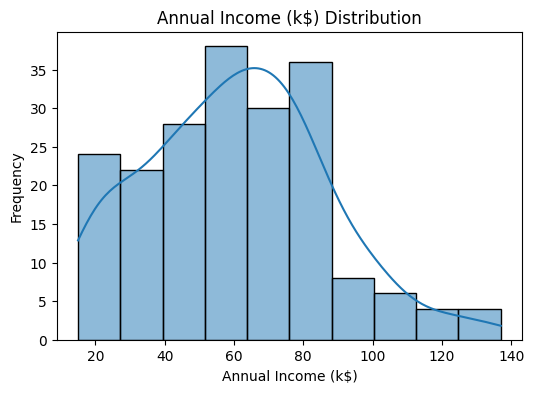

In [9]:
# Annual Income (k$) dist
visualize_column('Annual Income (k$)')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


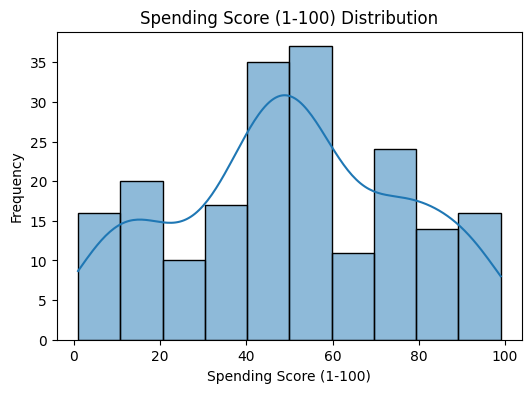

In [10]:
# Spending Score dist
visualize_column('Spending Score (1-100)')

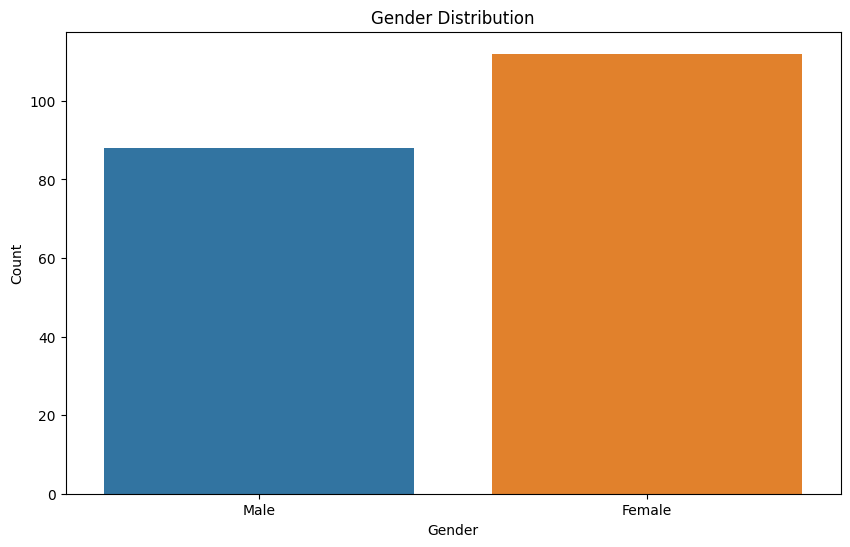

In [11]:
# Gender dist
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [12]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

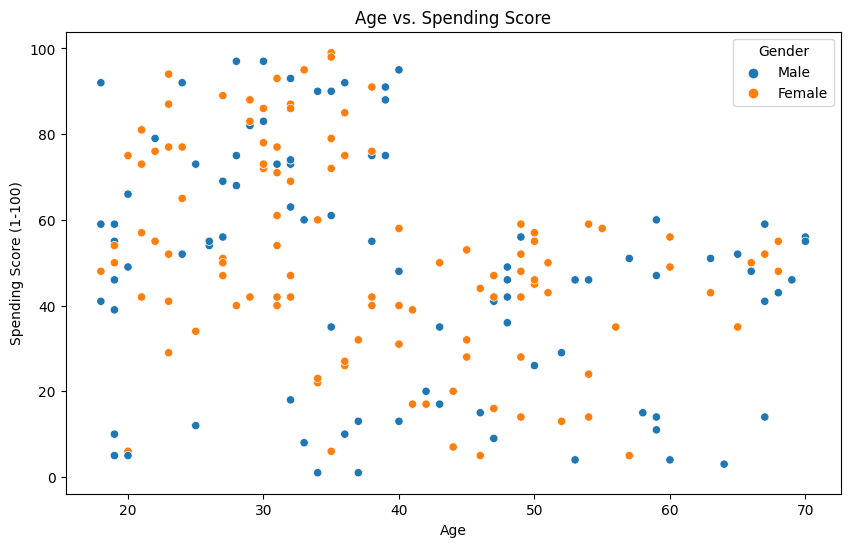

In [13]:
# Age vs. Spending score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Age vs. Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

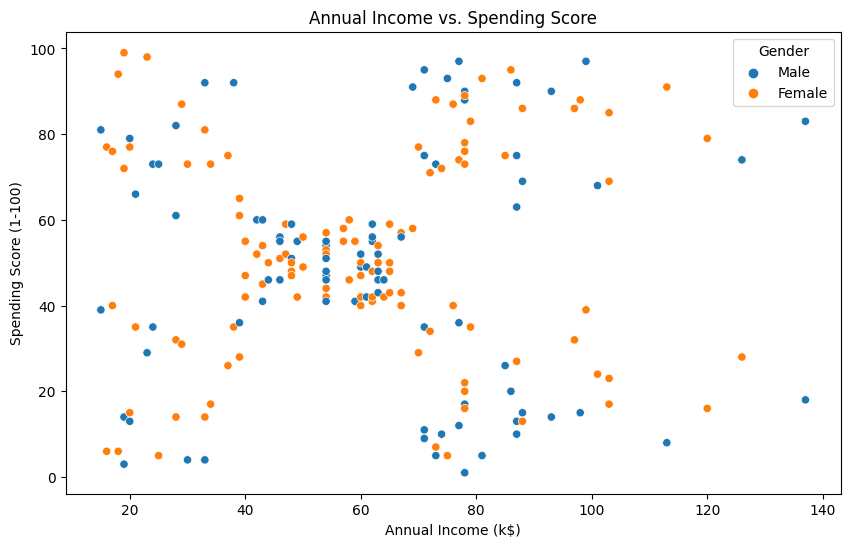

In [15]:
# Annual Income vs. Spending score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

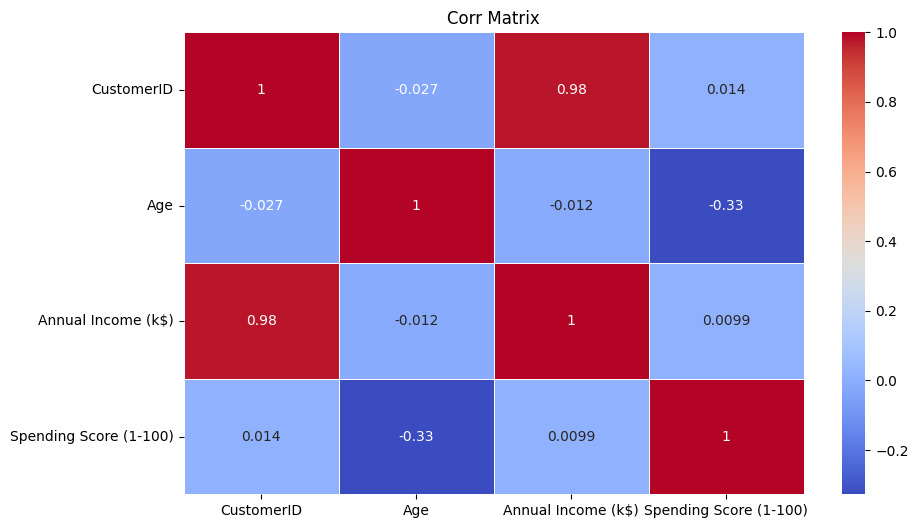

In [16]:
# corr matrix
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Corr Matrix')
plt.show()

# Data Preprocessing


In [17]:
from sklearn.preprocessing import StandardScaler

# Convert Gender to numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Standardize the features
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

In [18]:
df_scaled[:10]

array([[-1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [ 0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [ 0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [ 0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [ 0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [ 0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [ 0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [ 0.88640526, -0.6351352 , -1.58632148,  0.84631002]])

# Elbow Method

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

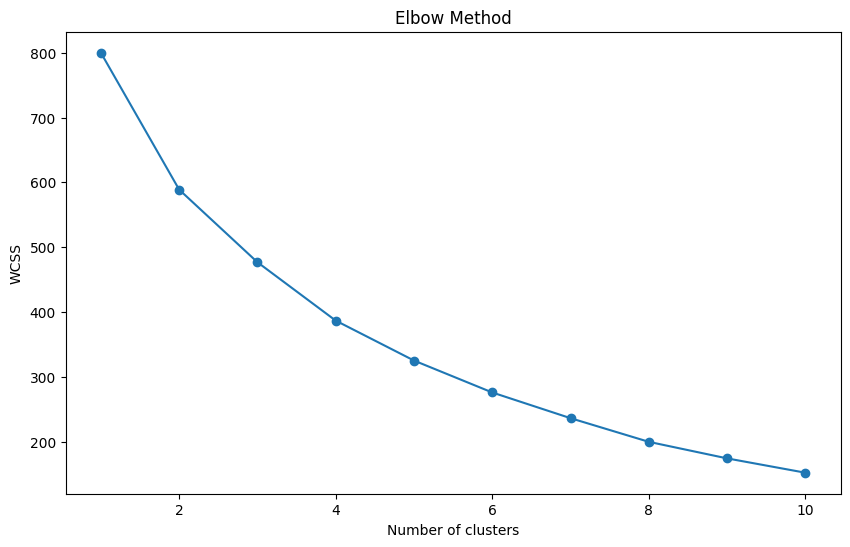

In [19]:
from sklearn.cluster import KMeans
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# K-Means clustring

In [20]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [21]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_pca)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


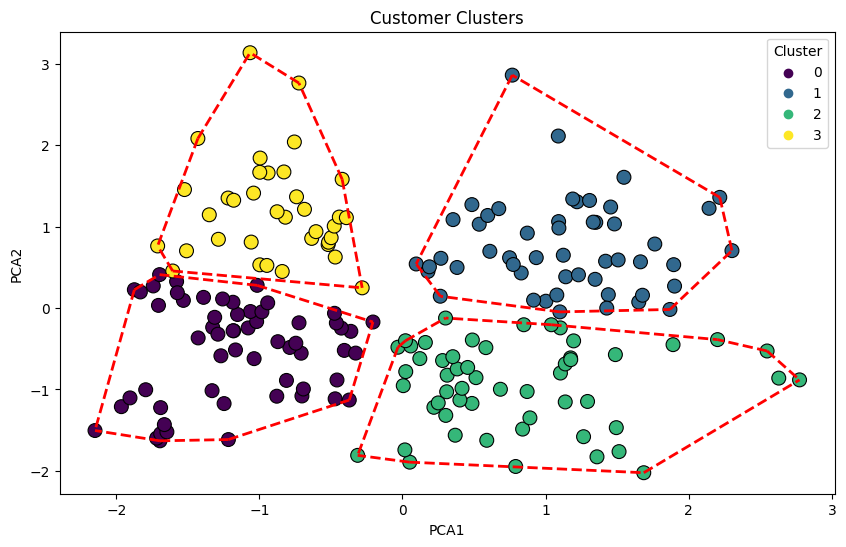

In [22]:
from sklearn.covariance import EllipticEnvelope
from scipy.spatial import ConvexHull

# Visualize the clusters with convex hulls
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100, edgecolor='k')

# Add convex hulls around clusters
for cluster in range(4):
    cluster_data = df[df['Cluster'] == cluster][['PCA1', 'PCA2']].values
    if len(cluster_data) > 2:  # Convex hull requires at least 3 points
        hull = ConvexHull(cluster_data)
        for simplex in hull.simplices:
            plt.plot(cluster_data[simplex, 0], cluster_data[simplex, 1], 'r--', lw=2)

plt.title('Customer Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

Cluster Summary:
         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         78.067797  0.830508  27.152542           49.305085   
1        130.392157  0.176471  47.647059           74.627451   
2         68.333333  0.870370  49.222222           46.222222   
3        143.166667  0.194444  30.000000           80.583333   

         Spending Score (1-100)      PCA1      PCA2  Count  
Cluster                                                     
0                     67.322034 -1.159153 -0.514721     59  
1                     30.862745  1.127734  0.752314     51  
2                     34.000000  0.800899 -0.952856     54  
3                     73.833333 -0.899248  1.207076     36  


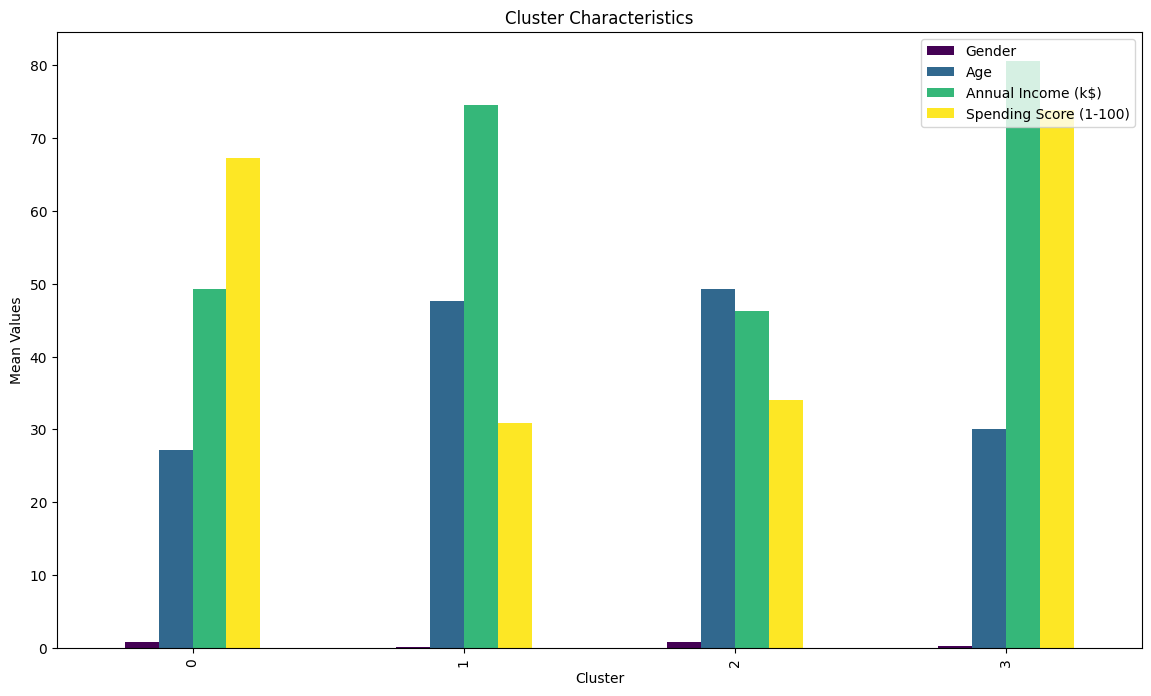


Marketing Insights:
Cluster 0: Predominantly Female customers with an average age of 27.2, an annual income of $49.3k, and a spending score of 67.3. Target this cluster with premium and high-quality products.
Cluster 1: Predominantly Male customers with an average age of 47.6, an annual income of $74.6k, and a spending score of 30.9. Offer discounts and promotions to increase spending.
Cluster 2: Predominantly Female customers with an average age of 49.2, an annual income of $46.2k, and a spending score of 34.0. Offer discounts and promotions to increase spending.
Cluster 3: Predominantly Male customers with an average age of 30.0, an annual income of $80.6k, and a spending score of 73.8. Target this cluster with premium and high-quality products.


In [28]:
# Analyze cluster characteristics
cluster_summary = df.groupby('Cluster').mean()
cluster_summary['Count'] = df['Cluster'].value_counts()

print("Cluster Summary:")
print(cluster_summary)

# Visualize cluster characteristics
def plot_cluster_summary(cluster_summary):
    features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
    cluster_summary[features].plot(kind='bar', figsize=(14, 8), colormap='viridis')
    plt.title('Cluster Characteristics')
    plt.xlabel('Cluster')
    plt.ylabel('Mean Values')
    plt.legend(loc='upper right')
    plt.show()

plot_cluster_summary(cluster_summary)

# Derive insights for targeted marketing
def derive_insights(cluster_summary):
    insights = []
    for cluster in cluster_summary.index:
        gender_ratio = cluster_summary.loc[cluster, 'Gender']
        age = cluster_summary.loc[cluster, 'Age']
        income = cluster_summary.loc[cluster, 'Annual Income (k$)']
        spending_score = cluster_summary.loc[cluster, 'Spending Score (1-100)']
        
        if gender_ratio > 0.5:
            gender = "Female"
        else:
            gender = "Male"
        
        insight = f"Cluster {cluster}: Predominantly {gender} customers with an average age of {age:.1f}, an annual income of ${income:.1f}k, and a spending score of {spending_score:.1f}. "
        
        if spending_score > 60:
            insight += "Target this cluster with premium and high-quality products."
        elif spending_score < 40:
            insight += "Offer discounts and promotions to increase spending."
        else:
            insight += "Focus on providing value-for-money products."
        
        insights.append(insight)
    
    return insights

insights = derive_insights(cluster_summary)

print("\nMarketing Insights:")
for insight in insights:
    print(insight)


In [33]:

# Derive insights for targeted marketing
def derive_insights(cluster_summary):
    insights = []
    for cluster in cluster_summary.index:
        gender_ratio = cluster_summary.loc[cluster, 'Gender']
        age = cluster_summary.loc[cluster, 'Age']
        income = cluster_summary.loc[cluster, 'Annual Income (k$)']
        spending_score = cluster_summary.loc[cluster, 'Spending Score (1-100)']
        
        if gender_ratio > 0.5:
            gender = "Female"
        else:
            gender = "Male"
        
        insight = f"Cluster {cluster}: Predominantly {gender} customers with an average age of {age:.1f}, an annual income of ${income:.1f}k, and a spending score of {spending_score:.1f}. "
        
        if spending_score > 60:
            insight += "Target this cluster with premium and high-quality products."
        elif spending_score < 40:
            insight += "Offer discounts and promotions to increase spending."
        else:
            insight += "Focus on providing value-for-money products."
        
        insights.append(insight)
    
    return insights

insights = derive_insights(cluster_summary)

print("\nMarketing Insights:")
for insight in insights:
    print(insight)



Marketing Insights:
Cluster 0: Predominantly Male customers with an average age of 49.4, an annual income of $62.4k, and a spending score of 29.2. Offer discounts and promotions to increase spending.
Cluster 1: Predominantly Female customers with an average age of 28.4, an annual income of $59.7k, and a spending score of 67.7. Target this cluster with premium and high-quality products.
Cluster 2: Predominantly Female customers with an average age of 48.1, an annual income of $58.8k, and a spending score of 34.8. Offer discounts and promotions to increase spending.
Cluster 3: Predominantly Male customers with an average age of 28.2, an annual income of $62.0k, and a spending score of 71.7. Target this cluster with premium and high-quality products.


In [35]:
import os

# Create the 'data' directory if it doesn't exist
os.makedirs('data', exist_ok=True)

In [36]:
# Analyze the cluster characteristics
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

# Save the cluster summary
cluster_summary.to_csv('data/cluster_summary.csv', index=True)


         CustomerID  Gender        Age  Annual Income (k$)  \
Cluster                                                      
0        104.958333     0.0  49.437500           62.416667   
1        100.210526     1.0  28.438596           59.666667   
2         94.818182     1.0  48.109091           58.818182   
3        103.375000     0.0  28.250000           62.000000   

         Spending Score (1-100)      PCA1      PCA2  
Cluster                                              
0                     29.208333  1.346375  0.598558  
1                     67.684211 -1.187729 -0.434236  
2                     34.781818  0.660985 -0.737231  
3                     71.675000 -0.831991  0.914209  
